In [53]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale



In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL notebooks/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
51,9420-LOJKX,Female,0,No,No,15,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.10,1426.4,Yes
4261,6195-MELTI,Male,0,No,No,57,Yes,No,DSL,No,...,No,Yes,No,No,One year,Yes,Mailed check,54.65,3134.7,No
3152,9909-DFRJA,Female,0,No,No,26,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),95.85,2475.35,No
6012,5685-IIXLY,Female,0,Yes,Yes,5,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.60,404.2,Yes
1756,0134-XWXCE,Female,1,No,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),74.85,3268.05,No


In [4]:
df.drop("customerID" , axis = 1 , inplace=True)

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6388,1963-VAUKV,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,Yes
493,5756-OZRIO,Male,1,Yes,No,61,Yes,Yes,DSL,No,...,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.6,No
2099,2190-BCXEC,Female,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,No
6806,4933-BSAIP,Female,0,Yes,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.1,No
6603,2257-BOVXD,Male,0,Yes,No,14,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),66.60,979.5,No


In [5]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [6]:
df = pd.to_numeric(df.TotalCharges)


ValueError: Unable to parse string " " at position 488

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [8]:
df1 = df[df.TotalCharges!=" "]
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)
df1.sample(5)

<ipython-input-8-ff080abff798>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges= pd.to_numeric(df1.TotalCharges)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1598,Male,0,Yes,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,520.55,No
149,Male,0,Yes,Yes,15,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.40,No
6456,Female,0,No,Yes,50,Yes,No,Fiber optic,No,No,No,No,No,No,Two year,No,Credit card (automatic),70.35,3533.60,No
2654,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.75,90.75,Yes
3194,Female,1,Yes,No,43,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),55.55,2342.20,Yes


In [9]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [10]:
df1[df1['Churn']=='No'].tenure

,tenure
0,1
1,34
3,45
6,22
7,10
...,...
7037,72
7038,24
7039,72
7040,11


##Churn No - Customer who stay with business
##Churn Yes - Customer who lived with business

Text(0.5, 1.0, 'tenure vs churn')

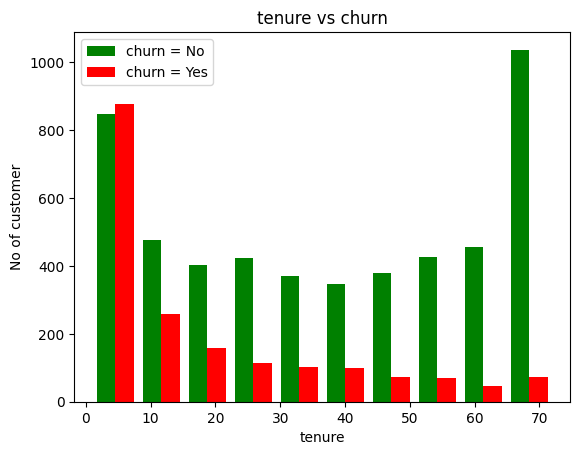

In [11]:
tenure_churn_No = df1[df1['Churn']=='No'].tenure
tenure_churn_Yes = df1[df1['Churn']=='Yes'].tenure
plt.hist([tenure_churn_No , tenure_churn_Yes ], color=['green','red'] , label=['churn = No' , 'churn = Yes'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("No of customer")
plt.title("tenure vs churn")


Text(0.5, 1.0, 'MonthlyCharges vs churn')

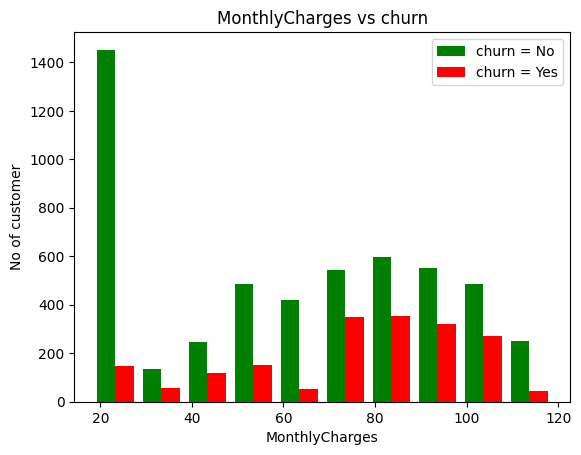

In [12]:
tenure_churn_No = df1[df1['Churn']=='No'].MonthlyCharges
tenure_churn_Yes = df1[df1['Churn']=='Yes'].MonthlyCharges
plt.hist([tenure_churn_No , tenure_churn_Yes ], color=['green','red'] , label=['churn = No' , 'churn = Yes'])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("No of customer")
plt.title("MonthlyCharges vs churn")


In [13]:
def unique_values(df1):
  for col in df1:
    if df1[col].dtypes == 'object':
      print(f"{col} : {df1[col].unique()}")

unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
df1.replace('No internet service','No' , inplace=True)
df1.replace('No phone service','No' , inplace=True)
unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<ipython-input-14-18827a5edc1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No' , inplace=True)
<ipython-input-14-18827a5edc1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No' , inplace=True)


In [15]:
columns  = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-15-7a4a438a16ac>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-15-7a4a438a16ac>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-15-7a4a438a16ac>:3: Setting

In [16]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

<ipython-input-16-56cf5fd99bb7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male':1,'Female':0},inplace=True)
<ipython-input-16-56cf5fd99bb7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Male':1,'Female':0},inplace=True)
<ipython-input-16-56cf

In [17]:
df1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [18]:
hot_class = ['InternetService','Contract','PaymentMethod']
for col in hot_class:
  encoder  = OneHotEncoder(sparse_output=False)
  encoded_values = encoder.fit_transform(df1[col].values.reshape(-1,1))
  features_names = encoder.get_feature_names_out([col])
  encoded_df = pd.DataFrame(encoded_values,columns=features_names)
  encoded_df = encoded_df.astype(int)
  df1 = pd.concat([df1,encoded_df],axis=1)
  df1.drop(col,axis=1,inplace=True)



In [24]:
df1.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_nan,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_nan
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1,0,0,0,0,0,1,0,0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0,1,0,0,0,0,0,1,0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,1,0,0,1,0,0,0,0


In [19]:
df1.dtypes

,0
gender,float64
SeniorCitizen,float64
Partner,float64
Dependents,float64
tenure,float64
PhoneService,float64
MultipleLines,float64
OnlineSecurity,float64
OnlineBackup,float64
DeviceProtection,float64


In [20]:
df2 = df1.fillna(0)


In [21]:
df3 = df2.astype('int64')

In [22]:
df3.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [23]:
df3.head(5000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_nan,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_nan
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,45,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,1,0,1,1,11,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5004,0,0,1,0,64,1,1,0,1,1,...,1,1,0,0,0,0,0,0,1,0
5005,0,0,1,0,39,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
5006,0,0,0,0,15,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
col_list_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df3[col_list_scale] = scaler.fit_transform(df3[col_list_scale])


In [31]:
df3['MonthlyCharges']

,MonthlyCharges
0,0.245763
1,0.474576
2,0.449153
3,0.355932
4,0.593220
...,...
3826,0.000000
4380,0.000000
5218,0.000000
6670,0.000000


In [32]:
df3['TotalCharges']

,TotalCharges
0,0.003339
1,0.217526
2,0.012437
3,0.211884
4,0.017388
...,...
3826,0.000000
4380,0.000000
5218,0.000000
6670,0.000000


In [33]:
df3['tenure']

,tenure
0,0.013889
1,0.472222
2,0.027778
3,0.625000
4,0.027778
...,...
3826,0.000000
4380,0.000000
5218,0.000000
6670,0.000000


In [44]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0. 1.]
SeniorCitizen: [0. 1.]
Partner: [1. 0.]
Dependents: [0. 1.]
tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.
  0.]
PhoneService: [0. 1.]
MultipleLines: [0. 1.]
OnlineSecurity: [0. 1.]
OnlineBackup: [1. 0.]
DeviceProtection: [0. 1.]
TechSupport: [0. 1.]
StreamingTV: [0. 1.]
StreamingMovies: [0. 1.]
PaperlessBilling: [1. 0.]
MonthlyCharges: [29.85 56.95 53.85 ... 44.2  78.7   0.  ]
TotalCharges: [  29.85 1889.5   108.15 ...  306.6  6844.5     0.  ]
Churn: [0. 1.]
InternetService_DSL: [1. 0.]
InternetService_Fiber optic: [0. 1.]
InternetService_No: [0. 1.]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
Contract_nan: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card

In [45]:
del_col= ['Contract_nan','PaymentMethod_nan',]
df3 = df3.drop(del_col,axis=1)

In [46]:
x = df3.drop('Churn',axis=1)
y = df3['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [47]:
x_train.shape

(5634, 26)

In [59]:
y_train

,Churn
5869,0
2463,0
5888,1
4716,0
1297,0
...,...
3051,0
1730,1
4086,0
2259,0


In [50]:
for col in df3:
    print(f'{col}: {df3[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.54166667
 0.        ]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechS

In [52]:
len(x_train.columns)

26

In [101]:


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='Nadam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=50)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6148 - loss: 0.6323
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.4852
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.4599
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.4486
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4209
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4371
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8059 - loss: 0.4204
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4302
Epoch 9/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 0.4305
Epoch 10/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8035 - loss: 0.4204
Epoch 11/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.4180
Epoch 12/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [102]:
model.evaluate(x_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7760 - loss: 0.4750


[0.47278693318367004, 0.7686302065849304]

In [68]:
y_test

,Churn
4220,0
5043,1
3719,0
1725,0
234,0
...,...
1211,1
3815,1
6205,1
6101,0


In [103]:
yp = model.predict(x_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [104]:
y_predicted = []
for i in yp:
  if i >0.5:
    y_predicted.append(1)
  else:
    y_predicted.append(0)


In [71]:
y_test[:10]

,Churn
4220,0
5043,1
3719,0
1725,0
234,0
4566,0
40,0
3461,0
5953,0
1093,0


In [105]:
y_predicted[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

Text(95.72222222222221, 0.5, 'Truth')

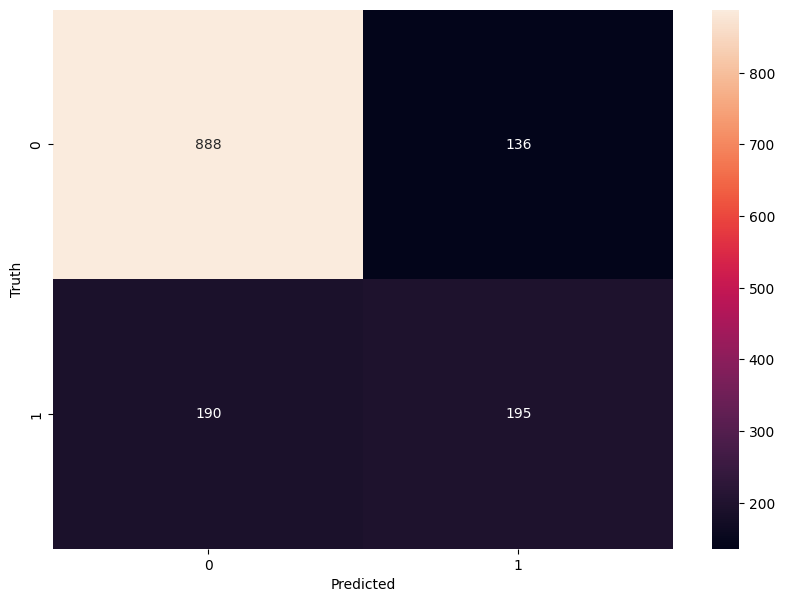

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1024
           1       0.59      0.51      0.54       385

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409

